In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv(r'USvideos.csv')
data.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...


In [4]:
data.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [5]:
data['category_id'][data['category_id'] == 1  ] = "Film & Animation"
data['category_id'][data['category_id'] == 2  ] = "Autos & Vehicles"
data['category_id'][data['category_id'] == 10 ] = "Music"
data['category_id'][data['category_id'] == 15 ] = "Pets & Animals"
data['category_id'][data['category_id'] == 17 ] = "Sports"
data['category_id'][data['category_id'] == 18 ] = "Short Movies"
data['category_id'][data['category_id'] == 19 ] = "Travel & Events"
data['category_id'][data['category_id'] == 20 ] = "Gaming"
data['category_id'][data['category_id'] == 21 ] = "Videoblogging"
data['category_id'][data['category_id'] == 22 ] = "People & Blogs"
data['category_id'][data['category_id'] == 23 ] = "Comedy"
data['category_id'][data['category_id'] == 24 ] = "Entertainment"
data['category_id'][data['category_id'] == 25 ] = "News & Politics"
data['category_id'][data['category_id'] == 26 ] = "Howto & Style"
data['category_id'][data['category_id'] == 27 ] = "Education"
data['category_id'][data['category_id'] == 28 ] = "Science & Technology"
data['category_id'][data['category_id'] == 29 ] = "Nonprofits & Activism"
data['category_id'][data['category_id'] == 30 ] = "Movies"
data['category_id'][data['category_id'] == 31 ] = "Anime/Animation"
data['category_id'][data['category_id'] == 32 ] = "Action/Adventure"
data['category_id'][data['category_id'] == 33 ] = "Classics"
data['category_id'][data['category_id'] == 34 ] = "Comedy"
data['category_id'][data['category_id'] == 35 ] = "Documentary"
data['category_id'][data['category_id'] == 36 ] = "Drama"
data['category_id'][data['category_id'] == 37 ] = "Family"
data['category_id'][data['category_id'] == 38 ] = "Foreign"
data['category_id'][data['category_id'] == 39 ] = "Horror"
data['category_id'][data['category_id'] == 40 ] = "Sci-Fi/Fantasy"
data['category_id'][data['category_id'] == 41 ] = "Thriller"
data['category_id'][data['category_id'] == 42 ] = "Shorts"
data['category_id'][data['category_id'] == 43 ] = "Shows"
data['category_id'][data['category_id'] == 44 ] = "Trailers"


C:\Users\jasonsu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [6]:
# 驗證
print(data.shape)
print(data[data['views'] > 10000].shape)
print(data[(data['views'] > 10000 ) & ((data['publish_time'].str.contains('2017')) | (data['publish_time'].str.contains('2018'))) ].shape)

(40949, 16)
(40122, 16)
(39957, 16)


In [7]:
# 篩資料：觀看數要大於10000，公開時間為 2007 & 2008
data = data[(data['views'] > 10000 ) & ((data['publish_time'].str.contains('2017')) | (data['publish_time'].str.contains('2018'))) ]

In [8]:
# data.to_csv('new.csv')

In [9]:
(data['tags'].str.count("\"")/2).max()
(data['tags'].str.count("\"")/2).min()

0.0

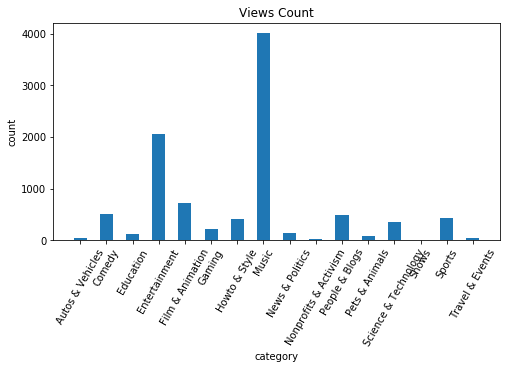

In [10]:
# 各類別的觀看總數(單位千萬)
# print(data.groupby('category_id'))
# count = data['views'].count()
x = data.groupby('category_id')['views'].sum().index
y = list(data.groupby('category_id')['views'].sum().div(10000000))
plt.figure(figsize=(8,4))
plt.title("Views Count")
plt.ylabel("count")
plt.xlabel("category")
plt.xticks(rotation=60)
plt.yticks(np.arange(0, 5000, 1000))

plt.bar(x,y,width = 0.5)
plt.savefig('p.png')

<BarContainer object of 16 artists>

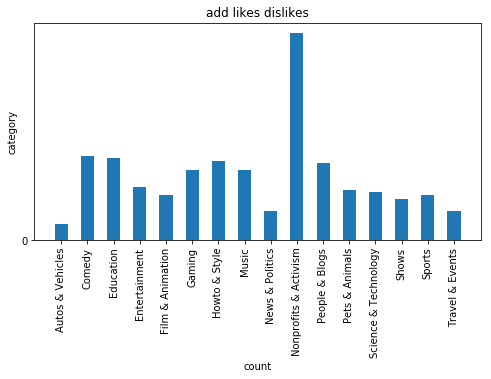

In [11]:
# 看 & 關注 比例
# data.loc[:,["category_id", "trending_date"]]
data.groupby("category_id")['views','likes','dislikes'].sum()
V = data.groupby("category_id")['views'].sum()
L = data.groupby("category_id")['likes'].sum()
D = data.groupby("category_id")['dislikes'].sum()
C = list(( ( L + D ) / V ) / 10000000)

x = data.groupby('category_id')['views'].sum().index
y = C
plt.figure(figsize=(8,4))
plt.title("add likes dislikes")
plt.xlabel("count")
plt.ylabel("category")
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 5000, 1000))

plt.bar(x,y,width = 0.5)
# plt.savefig('pp.png')

# print(data[data["category_id"].isin(["1"])]['views'].sum())
# print(data[data["category_id"].isin(["10"])]['views'].sum())

# a = (( data['likes'] + data['dislikes'] ) / data['views']).values.tolist()
# plt.plot(a)
# plt.show()

MAX：225211923
MIN：10001


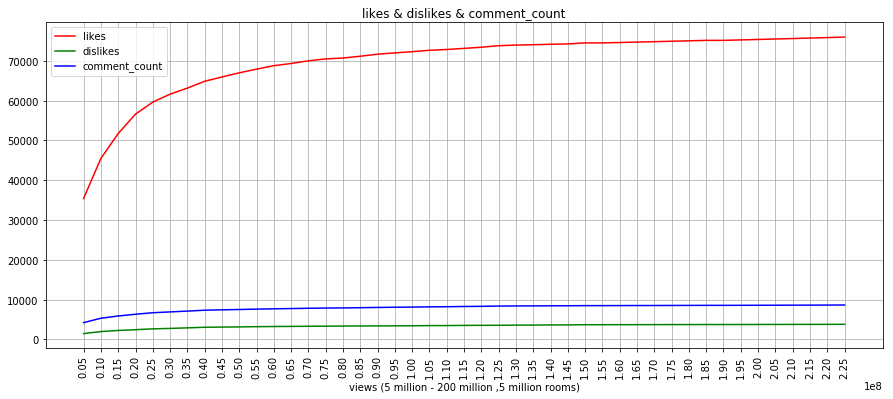

In [12]:
print("MAX：" + str(data['views'].values.max()))
print("MIN：" + str(data['views'].values.min()))

# data[data['views'] <= 2000000 ]
L = []
D = []
C = []
V = []
for num in range(5000000,225211923,5000000):
    L.append(data[ data['views'] <= num ]['likes'].values.mean())
    D.append(data[ data['views'] <= num ]['dislikes'].values.mean())
    C.append(data[ data['views'] <= num ]['comment_count'].values.mean())
    V.append(num)
# print(L)
# print(D)
# print(C)
# print(V)

plt.figure(figsize=(15,6))
plt.plot(V, L, "r-", label="likes")
plt.plot(V, D, "g-", label="dislikes")
plt.plot(V, C, "b-", label="comment_count")
plt.xticks(np.arange(5000000,225211923,5000000),rotation=90)
plt.title("likes & dislikes & comment_count")
plt.xlabel("views (5 million - 200 million ,5 million rooms)")
# plt.ylabel(":D")
plt.grid(True)
plt.legend()
plt.savefig('1.png')
plt.show()

35845
4112


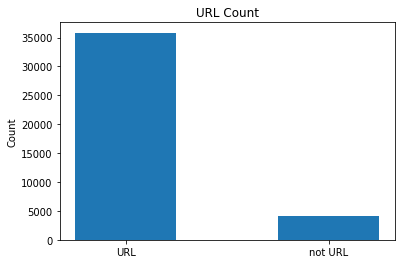

In [13]:
TD = data[ data['description'].str.find("http") != -1 ]['views'].count()
FD = data[ data['description'].str.find("http") == -1 ]['views'].count()

print(TD)
print(FD)

x = ["URL", "not URL"]
y = [TD, FD]
plt.title("URL Count")
# plt.xlabel("count")
plt.ylabel("Count")
plt.xticks()
plt.yticks(np.arange(0, 40000, 5000))
# plt.figure(figsize=(12,4))

plt.bar(x,y,width = 0.5)
plt.savefig('21.png')

1694585.8189093617
2531528.660247513
47.275375056754406
615.6441294376248
5373
34584


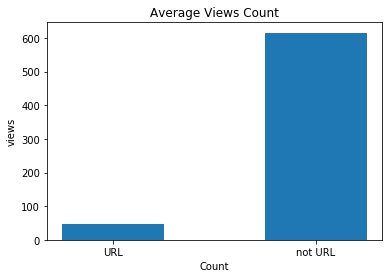

In [14]:
a = data[ data['description'].str.find("https://you") != -1 ]['views'].values.mean()
b = data[ data['description'].str.find("https://you") == -1 ]['views'].values.mean()
print(a)
print(b)
print(a/TD)
print(b/FD)

print(len(data[ data['description'].str.find("https://you") != -1 ]['views']))
print(len(data[ data['description'].str.find("https://you") == -1 ]['views']))
x = ["URL", "not URL"]
y = [a/TD, b/FD]
plt.title("Average Views Count")
plt.xlabel("Count")
plt.ylabel("views")
plt.xticks()
# plt.yticks(np.arange(0, 40000, 5000))
# plt.figure(figsize=(12,4))

plt.bar(x,y,width = 0.5)
plt.savefig('22.png')

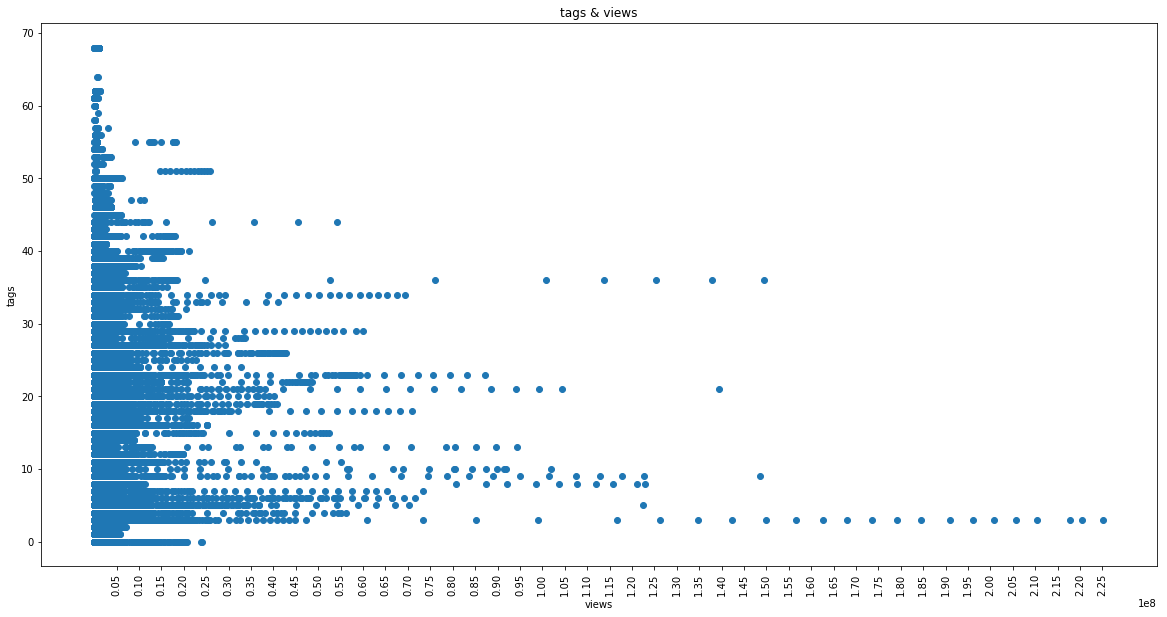

In [15]:
x = data['views']
y = data['tags'].str.count("\"")/2
plt.figure(figsize=(20,10))
plt.xticks(np.arange(0, 40000, 5000))
plt.title("tags & views")
plt.xlabel("views")
plt.ylabel("tags")
plt.xticks(np.arange(5000000,225211923,5000000),rotation=90)
plt.scatter(x,y)
plt.savefig('3.png')

In [16]:
print("年")
year = data['trending_date'].str[:2] + data['trending_date'].str[-2:]
data['trending_date']  = year

print(data['trending_date'])

年
0        1711
1        1711
2        1711
3        1711
4        1711
5        1711
6        1711
7        1711
8        1711
9        1711
10       1711
11       1711
12       1711
13       1711
14       1711
15       1711
16       1711
17       1711
18       1711
19       1711
20       1711
21       1711
22       1711
23       1711
24       1711
25       1711
26       1711
27       1711
28       1711
30       1711
         ... 
40919    1806
40920    1806
40921    1806
40922    1806
40923    1806
40924    1806
40925    1806
40926    1806
40927    1806
40928    1806
40929    1806
40930    1806
40931    1806
40932    1806
40933    1806
40934    1806
40935    1806
40936    1806
40937    1806
40938    1806
40939    1806
40940    1806
40941    1806
40942    1806
40943    1806
40944    1806
40945    1806
40946    1806
40947    1806
40948    1806
Name: trending_date, Length: 39957, dtype: object


In [17]:
data.to_csv('newtime.csv')

In [18]:
datatime = pd.read_csv(r'newtime.csv')
datatime.head(55)

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,0,2kyS6SvSYSE,1711.0,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,2017-11-13T17:13:01.000Z,SHANtell martin,748374.0,57527.0,2966.0,15954.0,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1,1ZAPwfrtAFY,1711.0,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783.0,97185.0,6146.0,12703.0,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,2,5qpjK5DgCt4,1711.0,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.0,146033.0,5339.0,8181.0,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,3,puqaWrEC7tY,1711.0,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168.0,10172.0,666.0,2146.0,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,4,d380meD0W0M,1711.0,I Dare You: GOING BALD!?,nigahiga,Entertainment,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731.0,132235.0,1989.0,17518.0,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
5,5,gHZ1Qz0KiKM,1711.0,2 Weeks with iPhone X,iJustine,Science & Technology,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180.0,9763.0,511.0,1434.0,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...
6,6,39idVpFF7NQ,1711.0,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,Entertainment,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417.0,15993.0,2445.0,1970.0,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...
7,7,nc99ccSXST0,1711.0,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,Science & Technology,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732.0,23663.0,778.0,3432.0,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....
8,8,jr9QtXwC9vc,1711.0,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,Film & Animation,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059.0,3543.0,119.0,340.0,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th..."
9,9,TUmyygCMMGA,1711.0,Why the rise of the robots won’t mean the end ...,Vox,News & Politics,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426.0,12654.0,1363.0,2368.0,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,"For now, at least, we have better things to wo..."


In [19]:
# data.loc[:,["category_id", "trending_date"]]
print(datatime.groupby("category_id")["views"].sum())
# print(data[data["category_id"].isin(["1"])]['views'].sum())
# print(data[data["category_id"].isin(["10"])]['views'].sum())

category_id
Autos & Vehicles         5.205984e+08
Comedy                   5.116509e+09
Education                1.180083e+09
Entertainment            2.060060e+10
Film & Animation         7.279675e+09
Gaming                   2.140905e+09
Howto & Style            4.078390e+09
Music                    4.013124e+10
News & Politics          1.472401e+09
Nonprofits & Activism    1.688837e+08
People & Blogs           4.915633e+09
Pets & Animals           7.645562e+08
Science & Technology     3.486991e+09
Shows                    5.150106e+07
Sports                   4.403882e+09
Travel & Events          3.435469e+08
Name: views, dtype: float64


In [20]:
a = (datatime.groupby(["trending_date","category_id"])["views"].sum()/10000000).unstack()
#所有資料除一千萬
#print(type(a))
a


category_id,Autos & Vehicles,Comedy,Education,Entertainment,Film & Animation,Gaming,Howto & Style,Music,News & Politics,Nonprofits & Activism,People & Blogs,Pets & Animals,Science & Technology,Shows,Sports,Travel & Events
trending_date,,,,,,,,,,,,,,,,
1711.0,4.105781,31.155429,6.098637,83.057996,43.624904,0.781249,17.630392,181.433214,4.501048,NaN,10.496512,1.566407,25.441584,NaN,8.470907,1.714996
1712.0,3.466890,64.478506,12.224983,305.411932,34.729140,4.253801,53.453979,223.474405,17.532109,0.013288,46.250819,9.314445,21.913334,0.139353,23.457449,3.278062
1801.0,4.232664,62.031132,10.219283,129.026601,47.806226,18.386765,32.338155,203.332646,17.283757,13.353415,37.714886,12.490563,15.948287,0.064566,38.093089,1.203452
1802.0,35.452339,45.282542,10.976257,154.173415,100.235068,4.070460,25.329606,186.586606,20.385519,3.248947,89.580331,5.475432,52.507456,NaN,57.386391,13.858191
1803.0,0.870116,79.468071,21.809050,266.765168,85.786892,23.230062,52.113532,391.272127,10.783091,NaN,60.704017,9.656639,52.264851,NaN,93.616818,6.510676
1804.0,3.067729,91.370889,18.247336,314.925899,94.921252,20.790337,69.572861,635.991682,14.907653,NaN,67.019710,7.900957,26.078083,1.962434,87.979755,4.270775
1805.0,0.864327,84.167700,28.422234,547.417501,175.223466,82.572557,104.111551,1502.334040,47.572199,0.142968,106.161084,13.585252,117.391881,2.182757,103.933703,2.027440
1806.0,NaN,53.696645,10.010505,259.281626,145.640581,60.005278,53.288937,688.699191,14.274736,0.129748,73.635894,16.465928,37.153672,0.800996,27.450132,1.491096


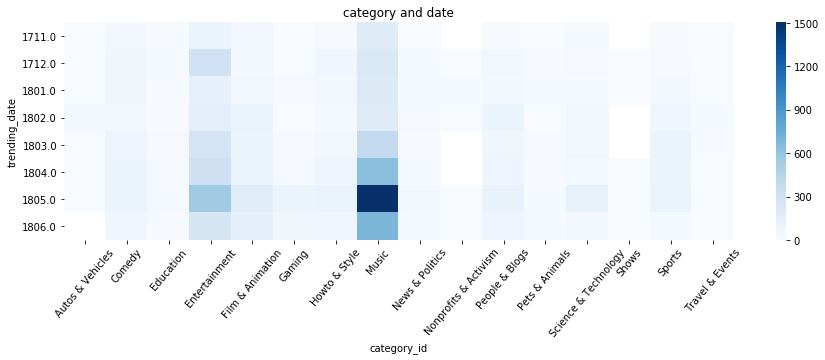

In [22]:
import sys
import seaborn as sns
f, ax = plt.subplots(figsize = (15, 4))
plt.title("category and date")
sns.heatmap(a ,cmap="Blues" ,ax = ax)
plt.xticks(rotation=50)
f.savefig('sns_heatmap_normal.jpg', bbox_inches='tight')